DATASET: https://www.kaggle.com/datasets/brsdincer/orbitclassification

# BUSSINESS UNDERSTANDING

Dalam fisika, suatu orbit atau garis edar adalah jalur yang dilalui oleh objek, di sekitar objek lainnya, di dalam pengaruh dari gaya gravitasi. peran orbit sangat penting karna berfungsi untuk menjaga agar jarak antar planet tetap ideal.

Orbit pun memiliki beberapa macam, tidaklah hanya satu. dikarenakan banyaknya macam orbit maka dari itu dibutuhkannya model yang mempermudah dalam proses peng-klasifikasian orbit.

Dalam model ini dibuat dengan metode klasifikasi dengan algoritma linear regression yang mengklasifikasi jenis orbit:

Apollos (APO) melintasi orbit Bumi dan memiliki sumbu semi-mayor lebih dari 1 AU

Amor (AMO) memiliki orbit yang benar-benar berada di luar orbit Bumi

Atens (ATE) melintasi orbit Bumi dan memiliki sumbu semi-mayor kurang dari 1 AU

Atiras (IEO) memiliki orbit yang benar-benar berada di dalam orbit Bumi

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('orbit.xlsx')

# DATA UNDERSTANDING

Deskripsi tabel:

a_AU - Sumbu semi-mayor orbit dalam AU

e - Eksentrisitas orbit

i_deg - Kemiringan orbit terhadap bidang ekliptika dan ekuinoks J2000 (J2000-Ekliptika) dalam derajat

w_derajat - Argumen perihelion (J2000-Ecliptic) dalam derajat

Node_deg - Bujur dari node naik (J2000-Elips) dalam derajat

M_deg -- Anomali rata-rata pada zaman dalam derajat

q_AU -- Jarak perihelion orbit dalam AU

Q_AU_1 - Jarak aphelion orbit dalam AU

P_yr - Periode orbit dalam tahun Julian

H_mag - Magnitudo V absolut

MOID_AU -- Jarak perpotongan orbit minimum (jarak minimum antara orbit osilasi NEO dan Bumi)

class -- Klasifikasi objek:

AMO*
APO*
ATE *
IEO*

In [3]:
df.head()

,a_AU,e,i_deg,w_deg,Node_deg,M_deg,q_AU,Q_AU_1,P_yr,H_mag,MOID_AU,class
0,107806558,826853942,228254952,313829659,880106813,2155287722,1867,197,112,169,34507,APO*
1,124530431,335342019,133374816,2768930236,3372079581,1041556065,8277,166,139,156,30669,APO*
2,147026416,559921778,63529947,2858525637,35736768,1746262134,647,229,178,1625,25795,APO*
3,177602471,650140732,398325384,2677919932,3569033434,1731885562,6214,293,237,152,3551,APO*
4,187412276,764601569,13263995,433880477,3496949443,2351586224,4412,331,257,188,11645,APO*


In [4]:
df.columns

Index(['a_AU', 'e', 'i_deg', 'w_deg', 'Node_deg', 'M_deg', 'q_AU', 'Q_AU_1',
       'P_yr', 'H_mag', 'MOID_AU', 'class'],
      dtype='object')

In [5]:
df.shape

(1727, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   a_AU      1727 non-null   int64 
 1   e         1727 non-null   int64 
 2   i_deg     1727 non-null   int64 
 3   w_deg     1727 non-null   int64 
 4   Node_deg  1727 non-null   int64 
 5   M_deg     1727 non-null   int64 
 6   q_AU      1727 non-null   int64 
 7   Q_AU_1    1727 non-null   int64 
 8   P_yr      1727 non-null   int64 
 9   H_mag     1727 non-null   int64 
 10  MOID_AU   1727 non-null   int64 
 11  class     1727 non-null   object
dtypes: int64(11), object(1)
memory usage: 162.0+ KB


In [7]:
df.isnull().sum()

a_AU        0
e           0
i_deg       0
w_deg       0
Node_deg    0
M_deg       0
q_AU        0
Q_AU_1      0
P_yr        0
H_mag       0
MOID_AU     0
class       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['class'].value_counts()

APO*    1477
ATE*     149
AMO*      96
IEO*       5
Name: class, dtype: int64

# DATA PREPROSESSING

<Axes: xlabel='class', ylabel='Count'>

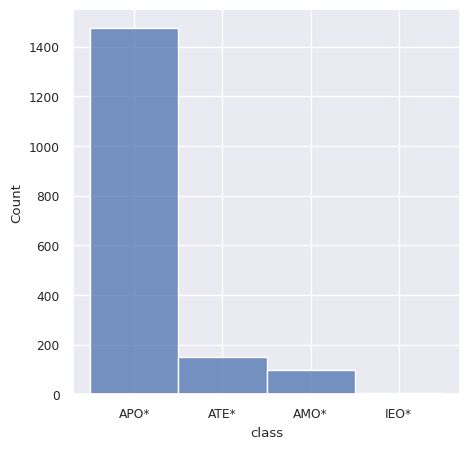

In [10]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='class')

In [11]:
df['class'].unique()

array(['APO*', 'ATE*', 'AMO*', 'IEO*'], dtype=object)

In [12]:
df = df.replace(['APO*', 'ATE*', 'AMO*', 'IEO*'],[0,1,2,3])

In [13]:
df.head()

,a_AU,e,i_deg,w_deg,Node_deg,M_deg,q_AU,Q_AU_1,P_yr,H_mag,MOID_AU,class
0,107806558,826853942,228254952,313829659,880106813,2155287722,1867,197,112,169,34507,0
1,124530431,335342019,133374816,2768930236,3372079581,1041556065,8277,166,139,156,30669,0
2,147026416,559921778,63529947,2858525637,35736768,1746262134,647,229,178,1625,25795,0
3,177602471,650140732,398325384,2677919932,3569033434,1731885562,6214,293,237,152,3551,0
4,187412276,764601569,13263995,433880477,3496949443,2351586224,4412,331,257,188,11645,0


# MODELLING

In [14]:
X = df.drop(columns='class', axis=1)
Y = df['class']

In [15]:
print(X)

           a_AU          e      i_deg       w_deg    Node_deg       M_deg  \
0     107806558  826853942  228254952   313829659   880106813  2155287722   
1     124530431  335342019  133374816  2768930236  3372079581  1041556065   
2     147026416  559921778   63529947  2858525637    35736768  1746262134   
3     177602471  650140732  398325384  2677919932  3569033434  1731885562   
4     187412276  764601569   13263995   433880477  3496949443  2351586224   
...         ...        ...        ...         ...         ...         ...   
1722  166282643  382486934    8746249  3049805063  2211566554  3121115718   
1723  270663044  764458947  114337423   282994922  2675011452  3442530886   
1724  203786953  667524986   89066493  2797219348   646902701    19063147   
1725  209519302  654661914    4014503  1454296528   251645232  3407661049   
1726  280429433  667236355   47248827  2341259803  1835746748  3495301596   

       q_AU  Q_AU_1  P_yr  H_mag  MOID_AU  
0      1867     197   112    16

In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1722    2
1723    0
1724    0
1725    0
1726    0
Name: class, Length: 1727, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(1727, 11) (1036, 11) (691, 11)


In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8494208494208494


In [23]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print("Akurasi data testing : ", testing_data_accuracy)

Akurasi data testing :  0.8465991316931982


# EVALUATION

In [26]:
input_data = (107806558,826853942,228254952,313829659,880106813,2155287722,1867,197,112,169,34507) # 0

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print()

if prediction == 0:
    print('Orbit termasuk kedalam kelas APO*')
elif prediction == 1:
    print('Orbit termasuk kedalam kelas ATE*')
elif prediction == 2:
    print('Orbit termasuk kedalam kelas AMO*')
else:
    print('Orbit termasuk kedalam kelas IEO*')

[0]

Orbit termasuk kedalam kelas APO*


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [27]:
import pickle

In [28]:
filename = 'orbit_model.sav'
pickle.dump(model, open(filename, 'wb'))